In [3]:
import pandas as pd
import os 
import random
from tqdm import tqdm
import dtale
import matplotlib.pyplot as plt

## Load in Reddit Data

In [4]:
filepath = "data/labelled_data/"

In [5]:
all_files = os.listdir(filepath)
comments = {}
posts = {}
for fname in tqdm(all_files):
    file = pd.read_csv(filepath+fname,sep='\t').drop('Unnamed: 0',axis=1)
    if 'submission' in fname:
        posts['_'.join(fname.split('_')[3:6])] = file      
    if 'comment' in fname:
        comments['_'.join(fname.split('_')[3:6])] = file
        

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 590/590 [00:11<00:00, 52.68it/s]


In [8]:
subset = []
for date,df in posts.items():
    df['date'] = date
    subset.append(df)
    
    
merged_posts = pd.concat(subset)
subset = []
for date,df in comments.items():
    df['date'] = date
    subset.append(df)
    
merged_comments = pd.concat(subset)

In [19]:
cols = ['corpus','date','subreddit','conflict','similarity','knowledge','power','status','support','identity','romance','trust','fun']
posts_df = merged_posts[cols]
comments_df = merged_comments[cols]

In [22]:
posts_df

,corpus,date,subreddit,conflict,similarity,knowledge,power,status,support,identity,romance,trust,fun
0,huh removed,2022_10_19,Bitcoin,0.554512,0.497601,0.430458,0.421383,0.433016,0.451236,0.480207,0.347141,0.460343,0.734248
1,thoughts nan,2022_10_19,Bitcoin,0.482155,0.482372,0.379812,0.432790,0.557055,0.545566,0.473274,0.575579,0.489739,0.644310
2,upcoming bitcoin trend removed,2022_10_19,Bitcoin,0.490358,0.436900,0.555486,0.497024,0.425656,0.425173,0.471847,0.220831,0.502855,0.426152
3,grayscale marks another all time discount reco...,2022_10_19,Bitcoin,0.165885,0.337131,0.742628,0.166191,0.350450,0.194612,0.411289,0.146768,0.264524,0.498372
4,barely sociable s video on satoshi nakamoto re...,2022_10_19,Bitcoin,0.487014,0.421258,0.595137,0.225521,0.373997,0.366704,0.457680,0.059590,0.392610,0.864695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,polkadot news today get the kanaria birds out nan,2022_04_12,Polkadot,0.289050,0.456930,0.528622,0.438773,0.416435,0.486686,0.373486,0.044448,0.197453,0.665351
220,why was i randomly banned from the polkadot di...,2022_04_12,Polkadot,0.743910,0.540374,0.528330,0.227609,0.277831,0.132191,0.446440,0.023150,0.070431,0.562017
221,be aware of this fake twitter user and scam si...,2022_04_12,Polkadot,0.406584,0.432570,0.569079,0.273209,0.392553,0.214049,0.405285,0.005370,0.664166,0.653440
222,just a few days to go for decoded voting who g...,2022_04_12,Polkadot,0.457784,0.322461,0.599916,0.318529,0.218505,0.331018,0.291270,0.003052,0.000002,0.427545


## Load in Correlation Data

In [23]:
coin_path = "data/coins/"
coin_fnames = os.listdir(coin_path)
coin_frames = {fname.split('.')[0].split('-')[1]:pd.read_csv(coin_path+fname).drop('Unnamed: 0',axis=1) for fname in coin_fnames}
coin_frames['SOL'].head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2022-09-18,33.748275,33.954715,30.979143,31.059854,6.948700e+08,1.099878e+10
1,2022-09-17,32.212245,33.848180,32.212245,33.750778,5.013024e+08,1.194725e+10
2,2022-09-16,33.044593,33.203124,31.641165,32.208857,7.659525e+08,1.140126e+10
3,2022-09-15,34.094293,34.715268,32.721894,33.047682,1.139378e+09,1.169821e+10
4,2022-09-14,33.018278,34.283197,32.870454,34.091570,1.003604e+09,1.206287e+10


In [104]:
coin_frames['ETH'].sort_values('Date').head(150).tail(50)['Date']

2499    2015-11-15
2498    2015-11-16
2497    2015-11-17
2496    2015-11-18
2495    2015-11-19
2494    2015-11-20
2493    2015-11-21
2492    2015-11-22
2491    2015-11-23
2490    2015-11-24
2489    2015-11-25
2488    2015-11-26
2487    2015-11-27
2486    2015-11-28
2485    2015-11-29
2484    2015-11-30
2483    2015-12-01
2482    2015-12-02
2481    2015-12-03
2480    2015-12-04
2479    2015-12-05
2478    2015-12-06
2477    2015-12-07
2476    2015-12-08
2475    2015-12-09
2474    2015-12-10
2473    2015-12-11
2472    2015-12-12
2471    2015-12-13
2470    2015-12-14
2469    2015-12-15
2468    2015-12-16
2467    2015-12-17
2466    2015-12-18
2465    2015-12-19
2464    2015-12-20
2463    2015-12-21
2462    2015-12-22
2461    2015-12-23
2460    2015-12-24
2459    2015-12-25
2458    2015-12-26
2457    2015-12-27
2456    2015-12-28
2455    2015-12-29
2454    2015-12-30
2453    2015-12-31
2452    2016-01-01
2451    2016-01-02
2450    2016-01-03
Name: Date, dtype: object

## Correlations

In [72]:
sol_view['Date'].head(100)

260    2022-01-01
259    2022-01-02
258    2022-01-03
257    2022-01-04
256    2022-01-05
          ...    
165    2022-04-06
164    2022-04-07
163    2022-04-08
162    2022-04-09
161    2022-04-10
Name: Date, Length: 100, dtype: object

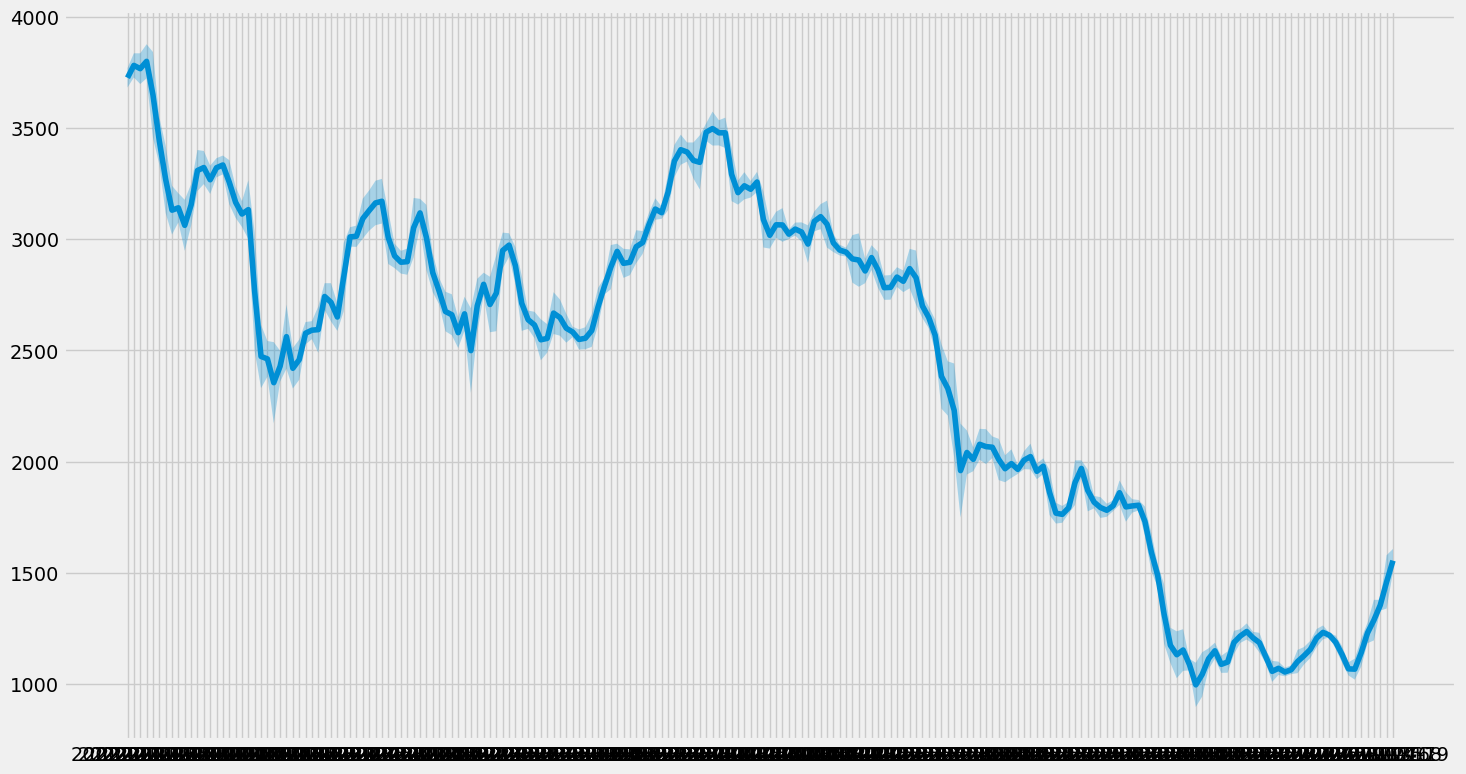

In [105]:
sol_view = coin_frames['ETH'].loc[coin_frames['ETH'].Date>='2022-01-01'].sort_values('Date').head(200)
sol_view['Mean'] = [(row['High']+row['Low'])/2 for k,row in sol_view.iterrows()]
plt.style.use('fivethirtyeight')
plt.figure(figsize=[16,9])
plt.plot(sol_view['Date'],sol_view['Mean'])
plt.fill_between(sol_view['Date'],
                 sol_view['Low'],
                 sol_view['High'],
                 alpha=.3)
plt.show()

In [106]:
sol_reddit = posts_df.loc[posts_df.subreddit == 'ethereum']
sol_reddit.head()

,corpus,date,subreddit,conflict,similarity,knowledge,power,status,support,identity,romance,trust,fun
130,heylink me customer4730 nan,2022_10_19,ethereum,0.434079,0.441594,0.397548,0.412248,0.565656,0.482972,0.453149,0.329821,4.821685e-01,0.424814
131,ayuda con metamask eth removed,2022_10_19,ethereum,0.540305,0.432405,0.533677,0.397030,0.421764,0.386479,0.471586,0.088582,5.579758e-01,0.460083
132,hi i m kinda new here and i don t know how to ...,2022_10_19,ethereum,0.031143,0.677264,0.931734,0.032815,0.641922,0.008432,0.348874,0.015404,8.307766e-07,0.459635
133,going back to removed,2022_10_19,ethereum,0.491291,0.475698,0.465004,0.463768,0.375364,0.501467,0.423317,0.370937,4.366017e-01,0.542340
134,top cross chain message token transaction betw...,2022_10_19,ethereum,0.368259,0.585041,0.694496,0.611453,0.372204,0.260989,0.497774,0.077168,5.160092e-01,0.288067


In [107]:
sol_reddit.date.min()
sol_reddit.date.max()

'2022_11_09'

In [108]:
sol_reddit = sol_reddit.sort_values('date')
sol_agg_mean = sol_reddit[sol_reddit.columns[1:]].groupby("date").mean()
sol_agg_min = sol_reddit[sol_reddit.columns[1:]].groupby("date").min()
sol_agg_std = sol_reddit[sol_reddit.columns[1:]].groupby("date").std()
sol_agg_max = sol_reddit[sol_reddit.columns[1:]].groupby("date").max()

In [109]:
dfs = {}

for col in sol_agg_mean.columns:
    dim_dict = {'date':sol_agg_max.head(200).index.tolist(),
                'mean':sol_agg_mean[col].head(200).values.tolist(),
                'min':(sol_agg_mean[col]-sol_agg_std[col]).head(200).values.tolist(),
                'max':(sol_agg_mean[col]+sol_agg_std[col]).head(200).values.tolist()}
    
    
    
    
    dfs[col] = pd.DataFrame(dim_dict)

In [110]:
dfs['conflict']

,date,mean,min,max
0,2022_01_03,0.411394,0.248884,0.573903
1,2022_01_06,0.381763,0.195138,0.568388
2,2022_01_07,0.356179,0.178976,0.533382
3,2022_01_08,0.361829,0.158629,0.565030
4,2022_01_09,0.383956,0.187627,0.580285
...,...,...,...,...
183,2022_11_03,0.336798,0.163702,0.509893
184,2022_11_04,0.296499,0.106557,0.486441
185,2022_11_05,0.298402,0.131513,0.465291
186,2022_11_06,0.311105,0.129406,0.492805


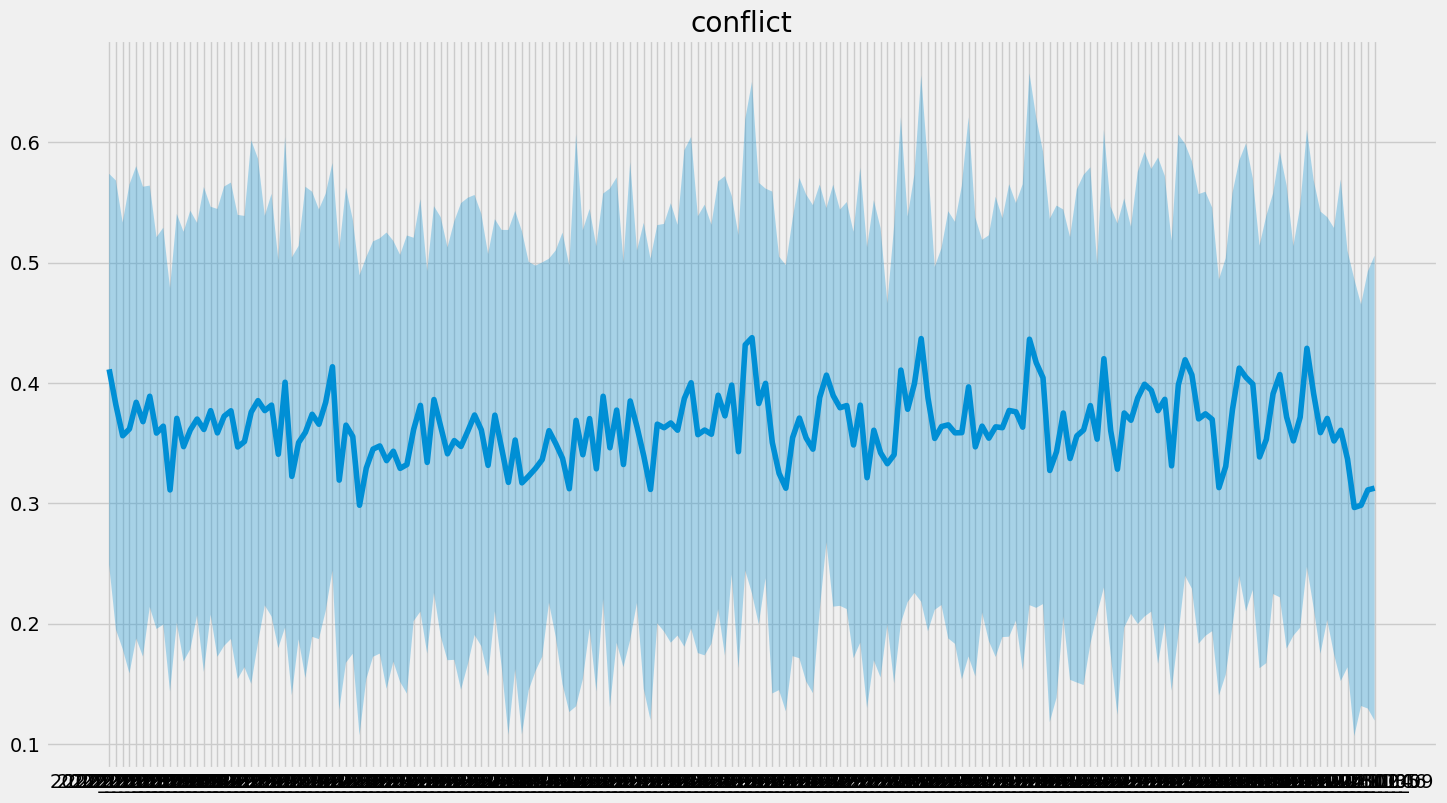

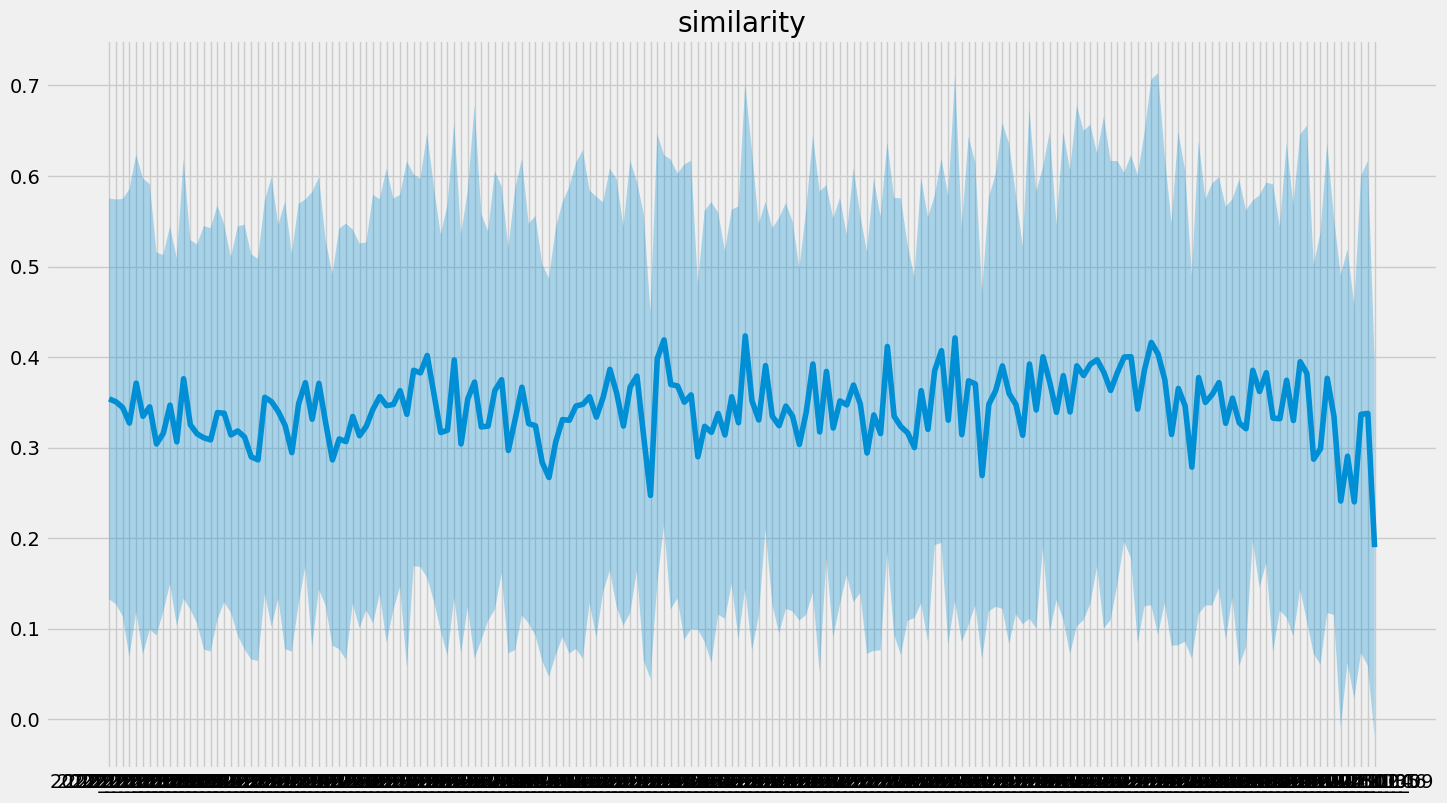

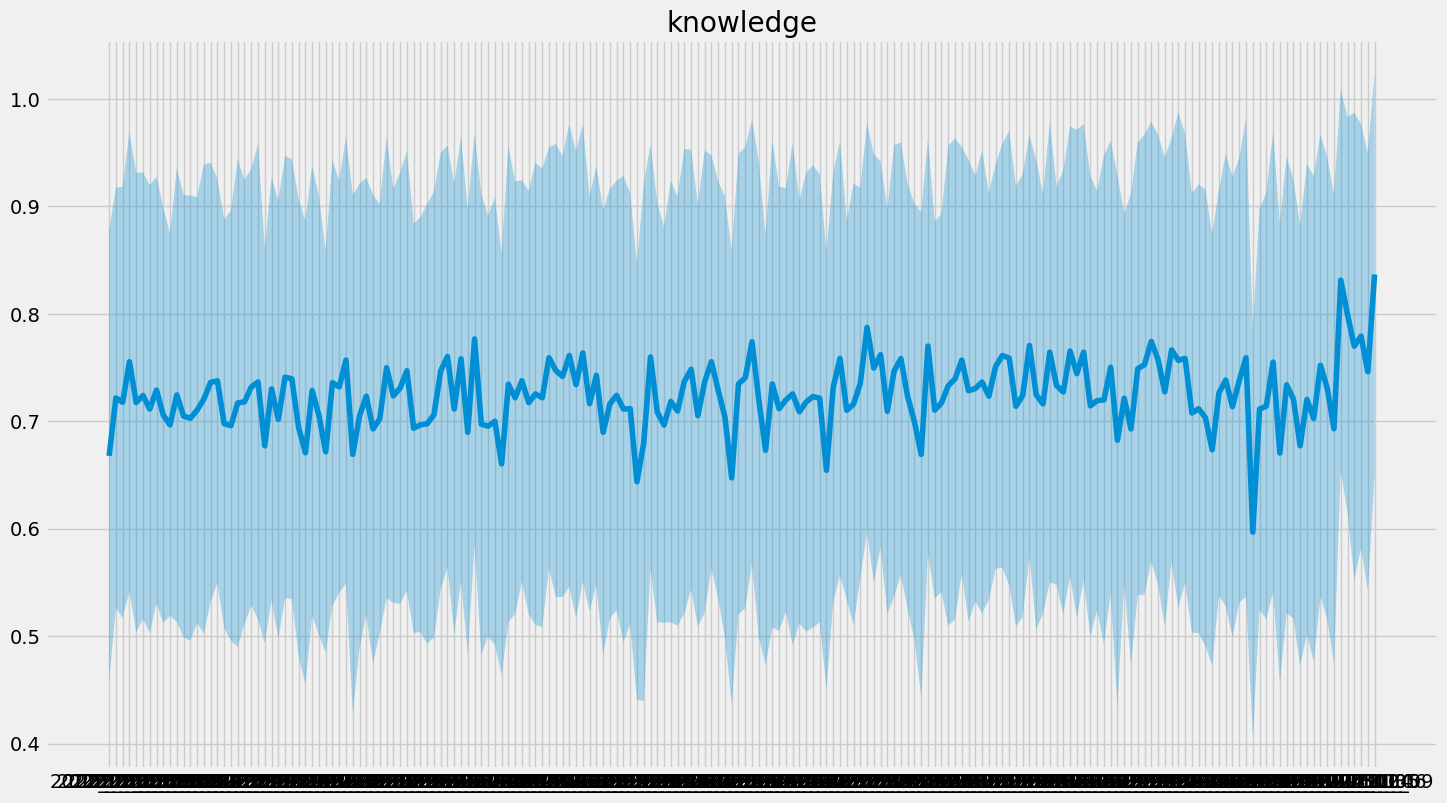

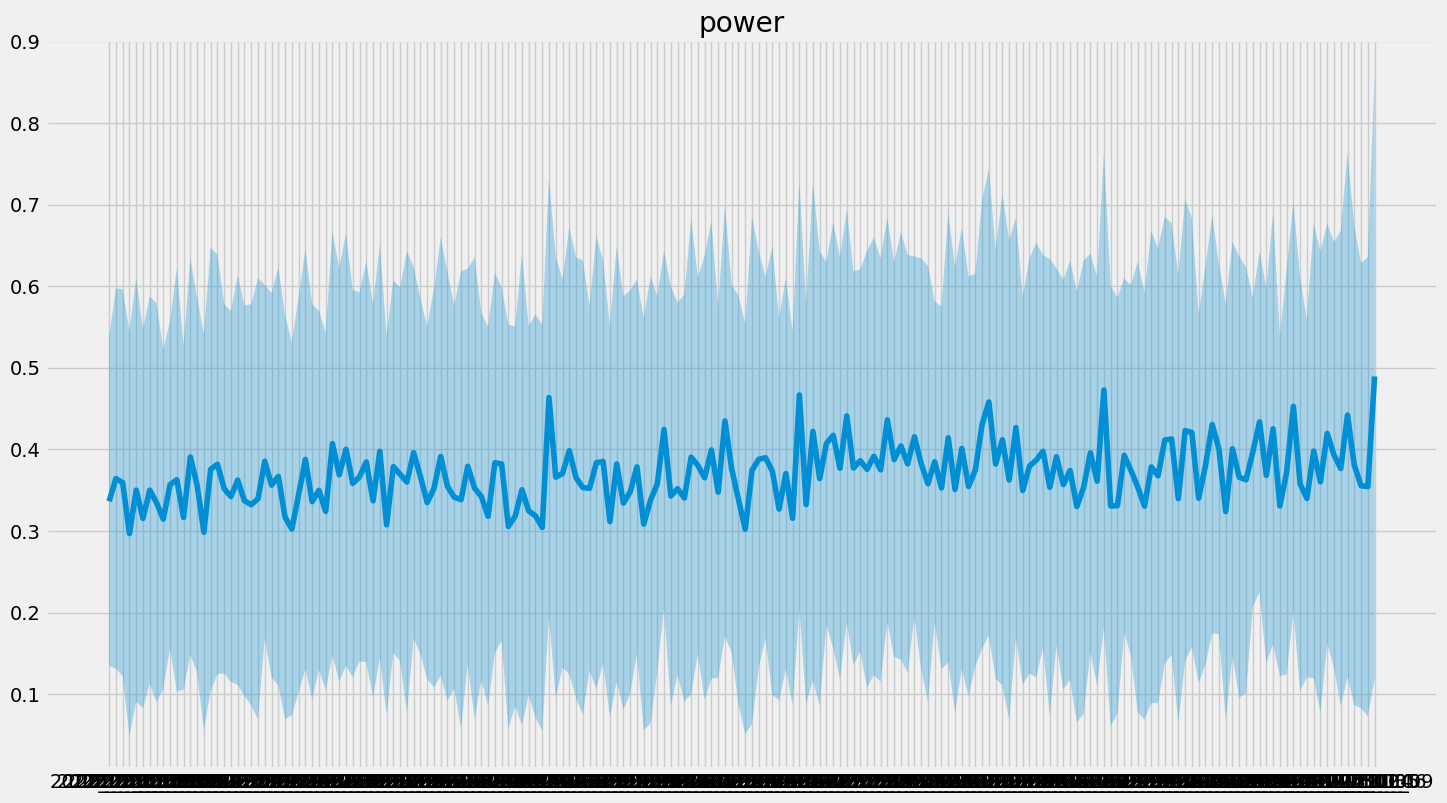

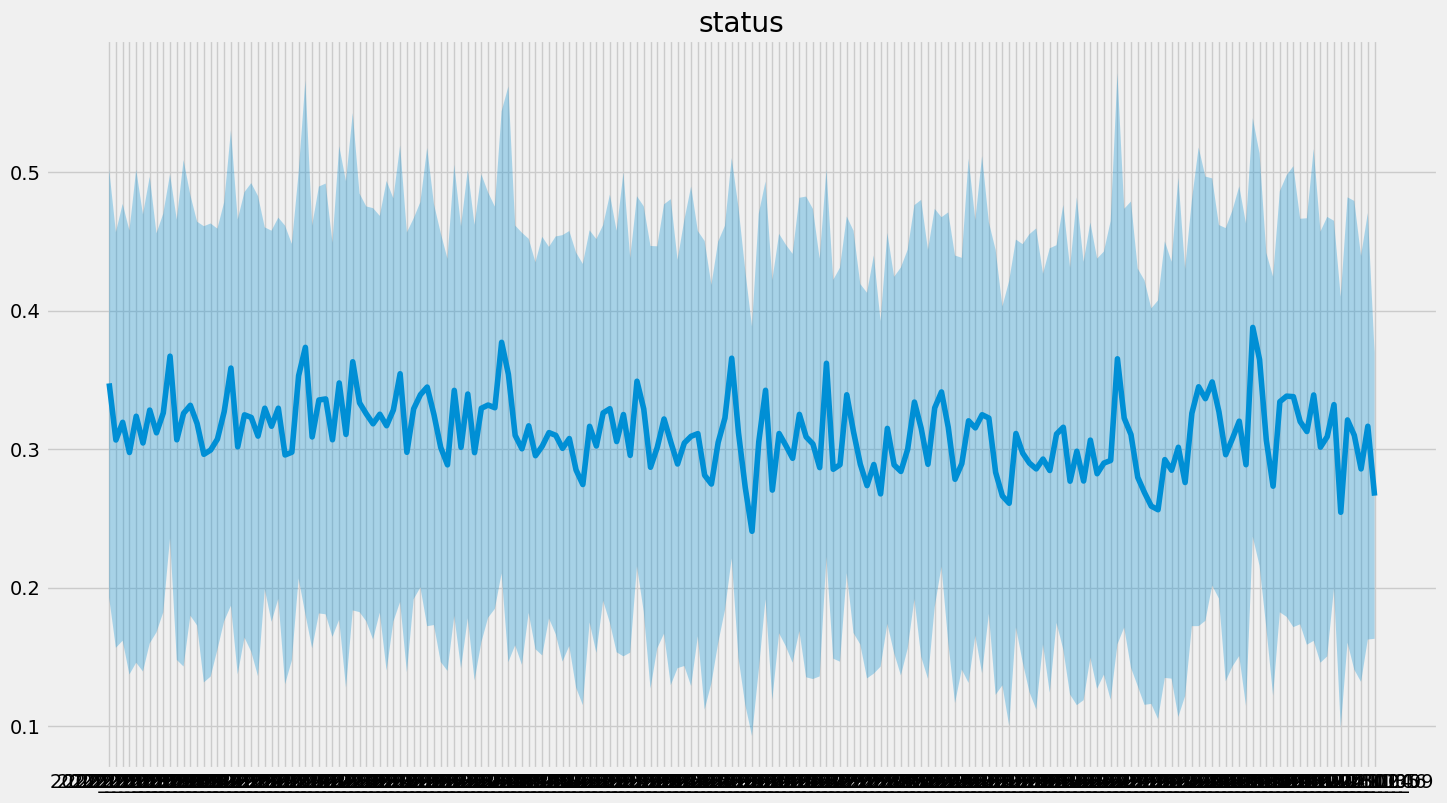

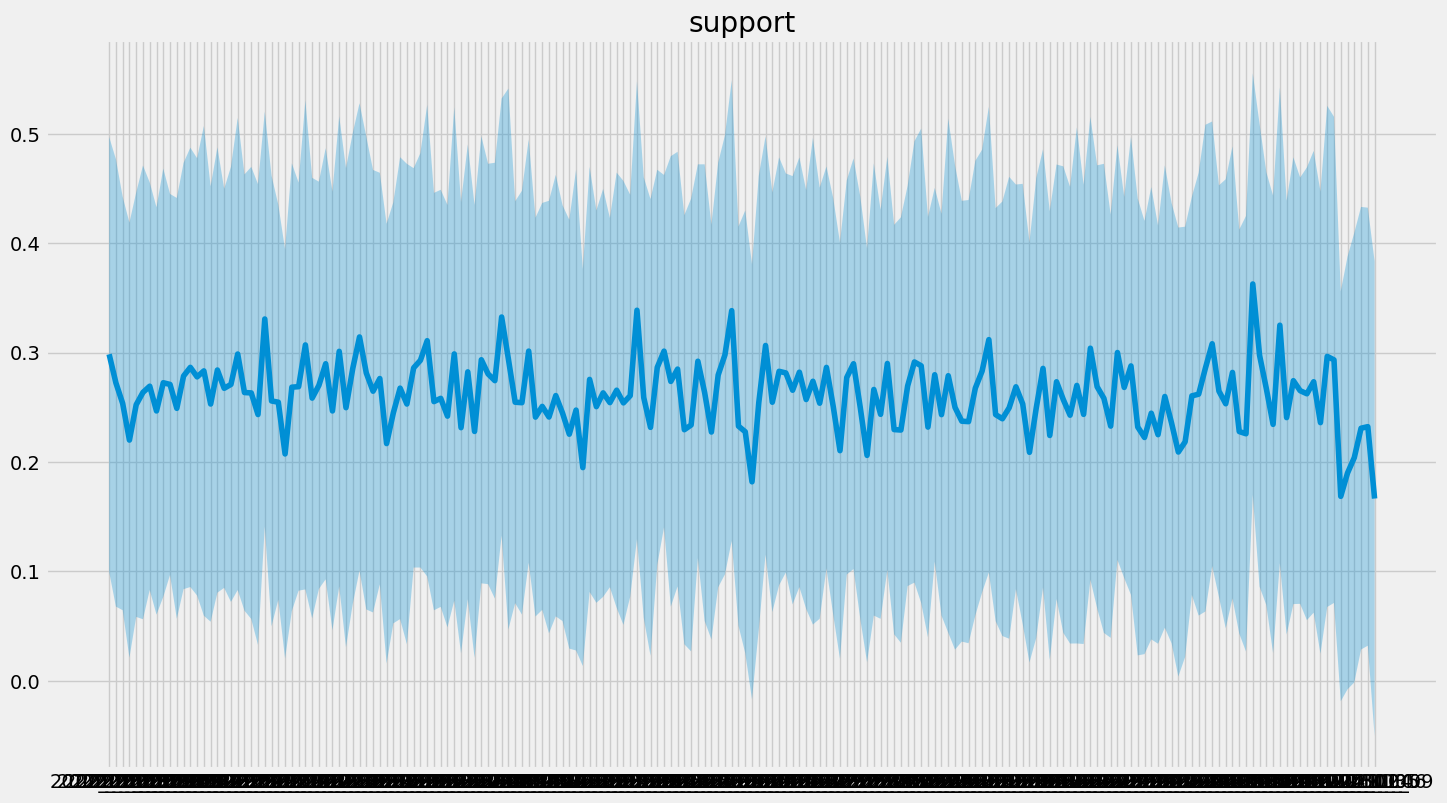

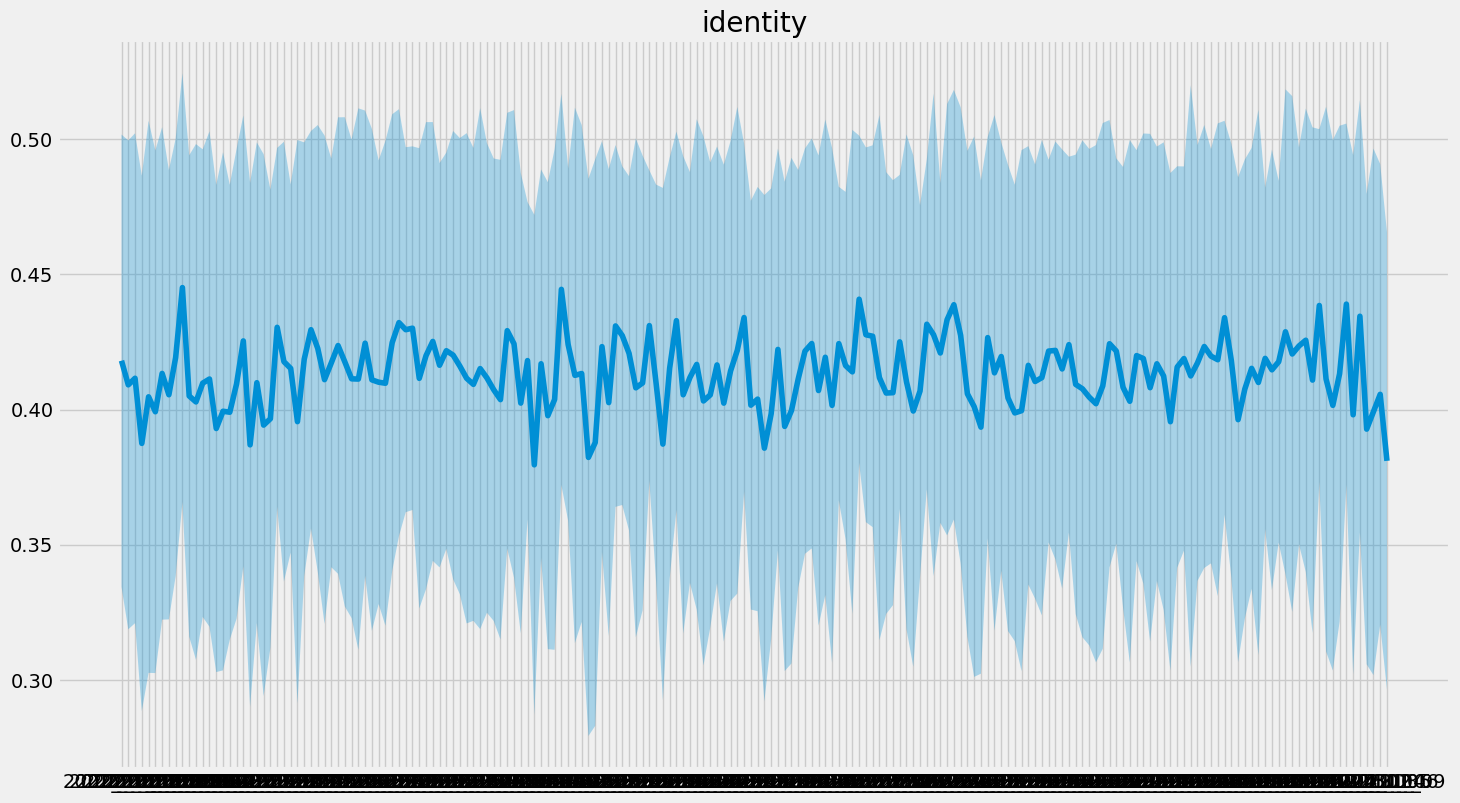

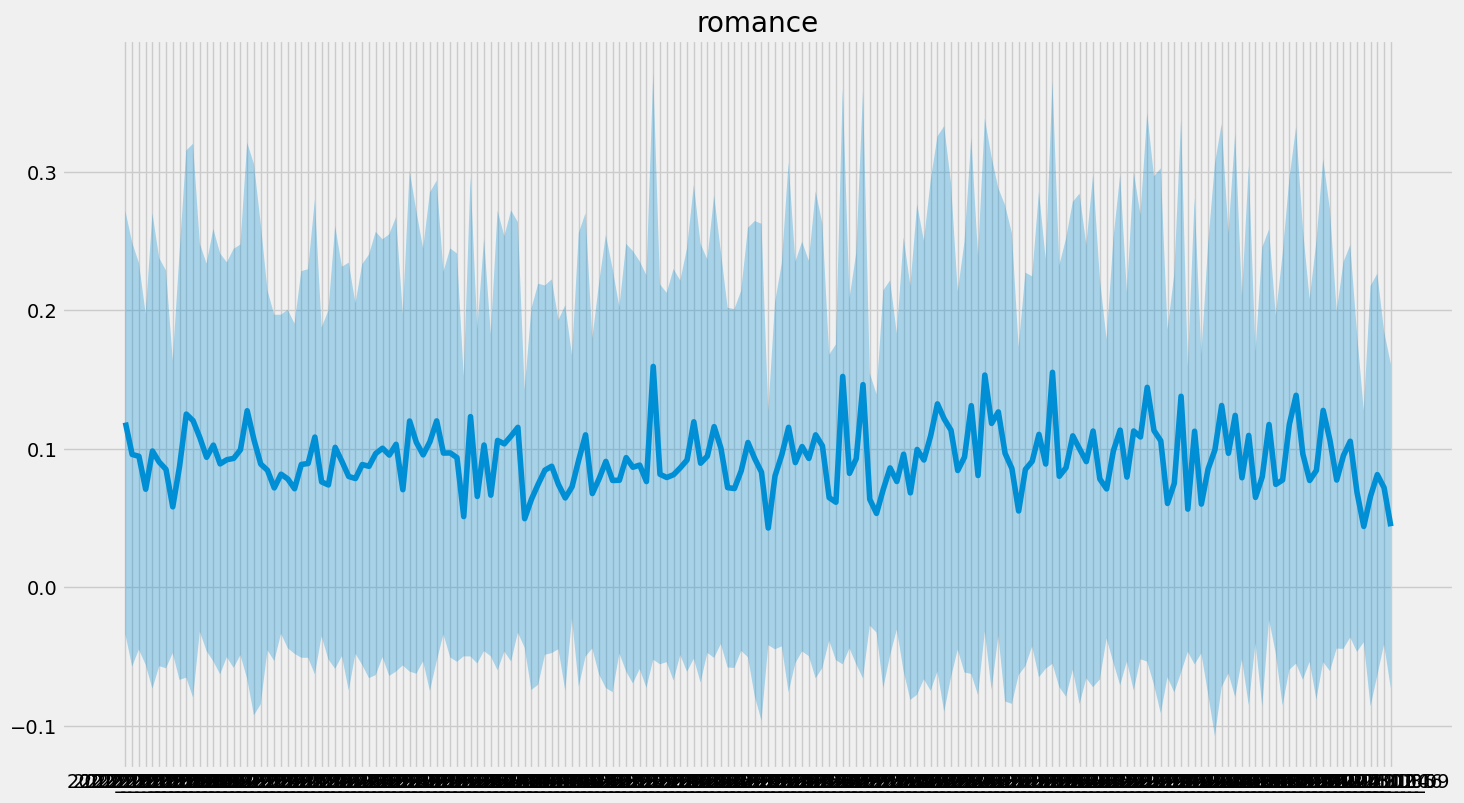

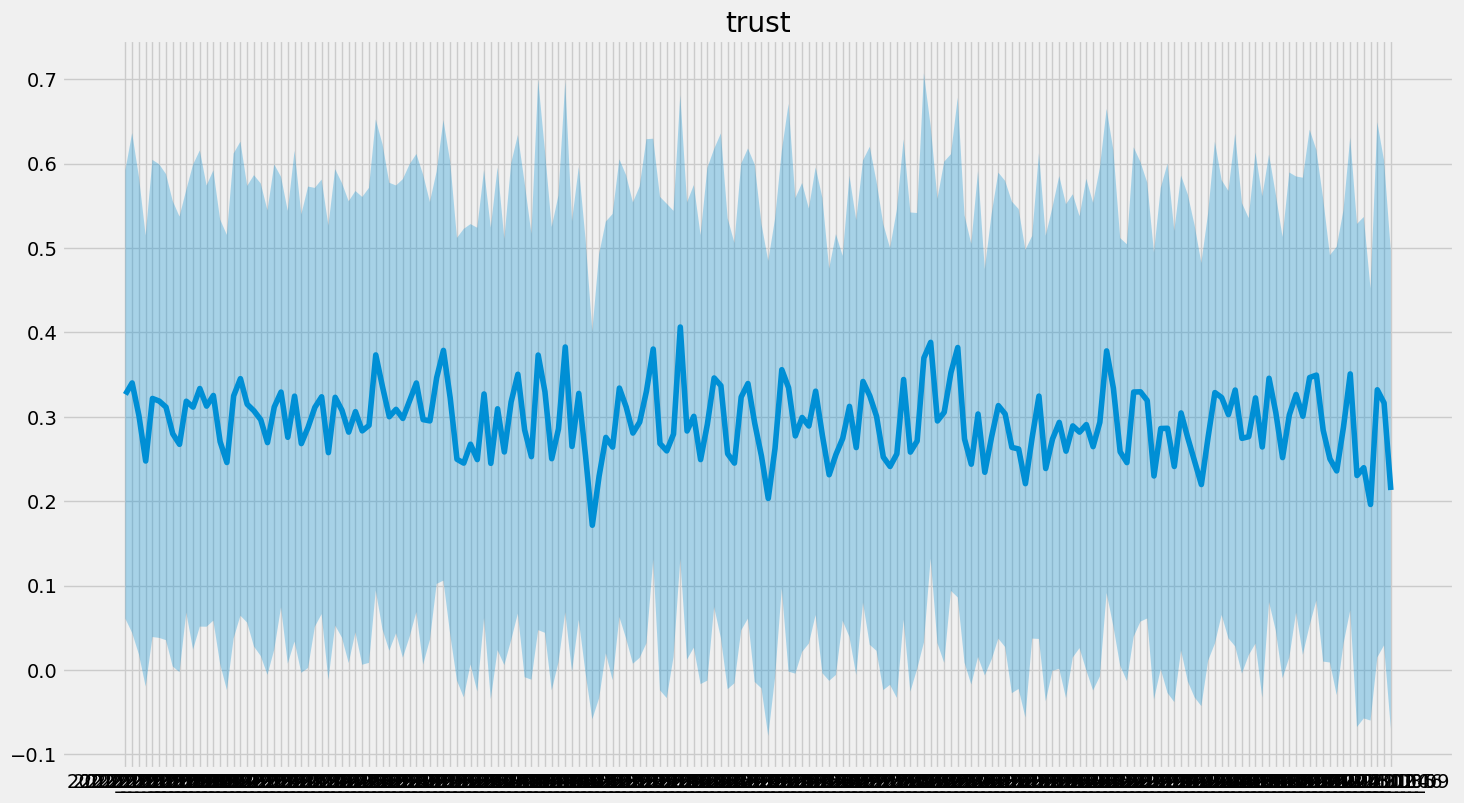

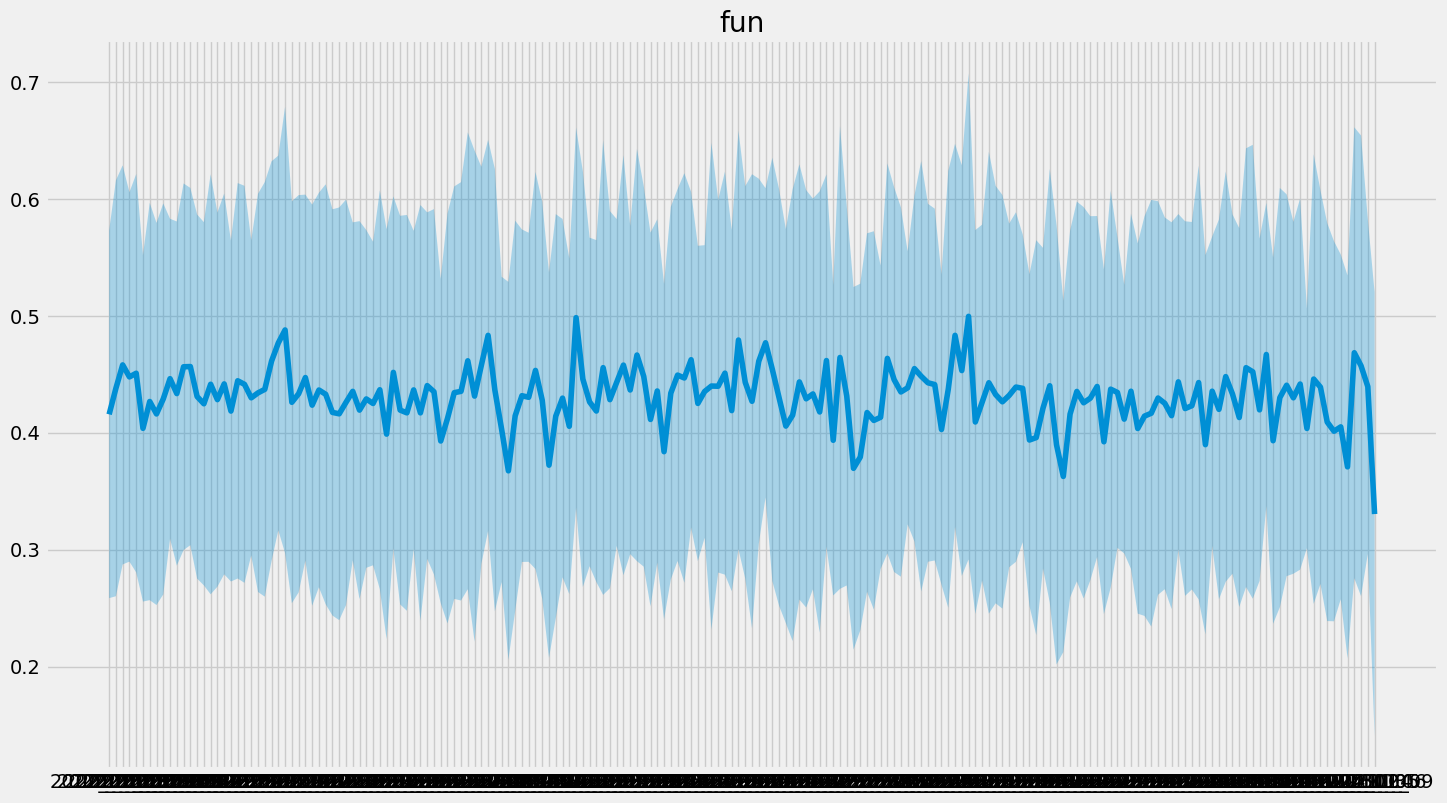

In [111]:
for dim in sol_agg_mean.columns:
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=[16,9])
    plt.title(dim)
    plt.plot(dfs[dim]['date'],dfs[dim]['mean'])
    plt.fill_between(dfs[dim]['date'],
                     dfs[dim]['min'],
                     dfs[dim]['max'],
                     alpha=.3)

    plt.show()

,conflict,similarity,knowledge,power,status,support,identity,romance,trust,fun
0,0.411394,0.353800,0.667796,0.336324,0.347472,0.298487,0.418106,0.119020,0.326558,0.415753
1,0.381763,0.350671,0.721784,0.364157,0.306610,0.272363,0.409170,0.095969,0.340169,0.438039
2,0.356179,0.344277,0.717704,0.359228,0.319372,0.253548,0.411614,0.094685,0.301499,0.458087
3,0.361829,0.327116,0.755439,0.296799,0.297609,0.220042,0.387504,0.070865,0.247660,0.447789
4,0.383956,0.371256,0.717460,0.350045,0.323752,0.252400,0.404745,0.098460,0.321772,0.450931
...,...,...,...,...,...,...,...,...,...,...
183,0.336798,0.290533,0.799339,0.442056,0.321076,0.189936,0.434548,0.044007,0.239758,0.370818
184,0.296499,0.240083,0.769927,0.380730,0.310008,0.204022,0.392786,0.065864,0.196170,0.468491
185,0.298402,0.336789,0.779274,0.355451,0.285760,0.230897,0.399205,0.081412,0.332050,0.457259
186,0.311105,0.337787,0.746147,0.354333,0.316536,0.232328,0.405662,0.071954,0.316467,0.439491


In [119]:
dtale.show(pd.DataFrame({dim:dfs[dim]['mean'] for dim in dfs.keys()}))